In [14]:
import pandas as pd
import seaborn as sb
import numpy as np 
sb.set_style('whitegrid')
from matplotlib import pyplot as plt

In [15]:
data=pd.read_csv(r"C:\Users\Shubh_Ram\Dropbox\My PC (LAPTOP-F3BSREE1)\Desktop\Online_ML_DataSets\insurance.csv")

In [16]:
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [17]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


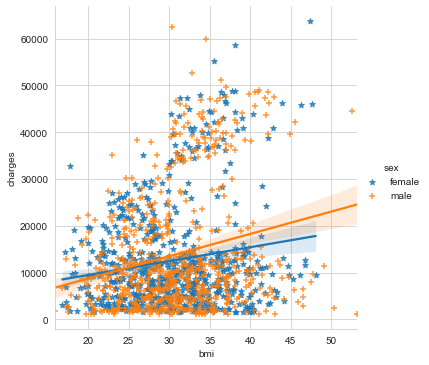

In [27]:
#plt.subplot(2,2,1)
sb.lmplot(x='bmi',y="charges",data=data,hue="sex",markers=['*','+'])
plt.show()

In [28]:
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [29]:
#separating feature and traget

In [32]:
X_feature=data.iloc[:,0:6]
Y_target=data.iloc[:,6]

In [33]:
#X_feature

In [34]:
X_feature.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [36]:
data.shape

(1338, 7)

In [41]:
encoded_data=pd.get_dummies(X_feature)

In [42]:
encoded_data.shape

(1338, 11)

In [43]:
encoded_data

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [44]:
#splitig in testing and training

In [45]:
from sklearn.model_selection import train_test_split

In [52]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(encoded_data,Y_target,test_size=.30,random_state=101)

In [54]:
#Training

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
trainer=LinearRegression()
learner=trainer.fit(Xtrain,Ytrain)

In [57]:
#Testing 
Yp=learner.predict(Xtest) 
Ya=Ytest

In [66]:
m=learner.coef_
#m[0]

In [61]:
c=learner.intercept_

In [62]:
#error
from sklearn.metrics import mean_squared_error

In [63]:
error=np.sqrt(mean_squared_error(Ya,Yp))
print(error)

5803.762514494926


In [69]:
Yp_age=m[0]*Xtest.iloc[:,0]+c+error

In [71]:
#Predicte_Age vs Charges 

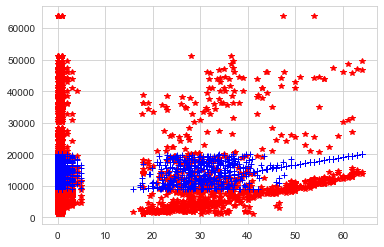

In [72]:
plt.plot(Xtest,Ytest,'r*')
plt.plot(Xtest,Yp_age,'b+')
plt.show()